In [461]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
from scipy import stats 

#### Question 1 
Import and store the data in a data frame. (2.5 points)

In [462]:
col_names = ['City1','City2','Average Fare', 'Distance', 'Average weekly passengers', 'market leading airline',\
             'market share', 'Average fare', 'Low price airline', 'market share', 'price']

In [463]:
col_width = [3,4,10,6,10,4,8,9,4,8,9]

In [464]:
df = pd.read_fwf("C:\\Users\\Dhirender.Jit\\airq402.dat", widths=col_width, names=col_names)

C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\parsers.py:710: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [465]:
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [466]:
df.describe()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [467]:
df.isna().sum()

City1                        0
City2                        0
Average Fare                 0
Distance                     0
Average weekly passengers    0
market leading airline       0
market share                 0
Average fare                 0
Low price airline            0
market share.1               0
price                        0
dtype: int64

In [468]:
df.describe(include='object')

,City1,City2,market leading airline,Low price airline
count,1000,1000,1000,1000
unique,90,85,16,19
top,ATL,TPA,WN,WN
freq,64,46,257,230


#### Question 2 
Remove the outliers from the data (5 points)

In [469]:
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr = q3-q1
iqr
lr = q1 - 1.5*iqr
ur = q3 + 1.5*iqr
for  i in range(len(lr)):
    df = df[(df[lr.index[i]] > lr[i]) & (df[lr.index[i]] < ur[i])]

In [470]:
print(df.shape)

(885, 11)


#### Question 3 
Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [471]:
y = df.iloc[:,[2]]
X = df.iloc[:,[0,1,3,4,5,6,7,8,9,10]]

#### Question 4
Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

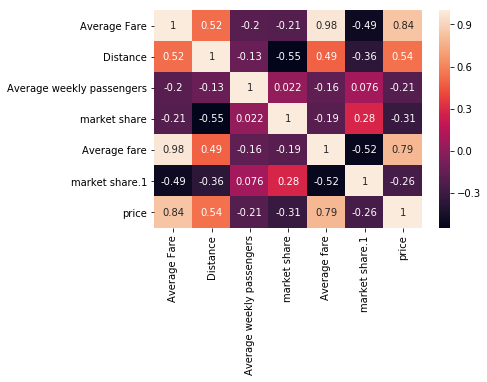

In [472]:
sns.heatmap(df.corr(),annot= True)

After looking at heatmap (1st row), there are 3 columns which have <.1 correlation i.e. Average weekly passange, market share, market share1. .. so removing these 3 columns. Also removing categorical columns. 

In [473]:
X.columns

Index(['City1', 'City2', 'Distance', 'Average weekly passengers',
       'market leading airline', 'market share', 'Average fare',
       'Low price airline', 'market share.1', 'price'],
      dtype='object')

In [474]:
X = X.drop(['City1', 'City2', 'Average weekly passengers', 'market share', 'market share.1', 'market leading airline', 'Low price airline'], axis=1)

In [475]:
X

,Distance,Average fare,price
0,528,111.03,111.03
1,860,123.09,118.94
2,852,223.98,167.12
3,288,68.86,68.86
4,723,161.36,145.42
5,1204,137.97,127.69
6,2237,148.59,148.59
7,2467,205.06,174.00
8,1073,127.69,127.69
9,1130,132.91,124.78


#### Question 5
Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

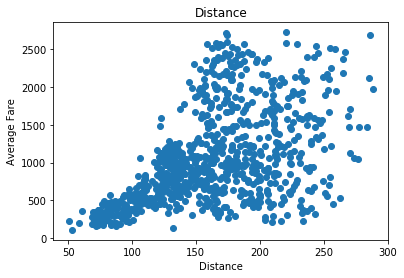

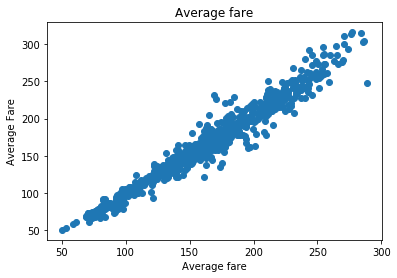

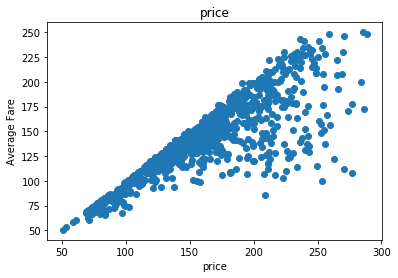

In [476]:
for i in range(len(X.columns)):
    plt.scatter(y.iloc[:,0], X.iloc[:,i])
    plt.title(X.columns[i])
    plt.xlabel(X.columns[i])
    plt.ylabel(y.columns[0])
    plt.show()
    

#### Question 6 
Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [477]:
from sklearn.model_selection import train_test_split

In [478]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state =1 )

In [479]:
from sklearn.linear_model import LinearRegression

In [480]:
lm = LinearRegression()

In [481]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Question 7
Print the coefficients & intercepts of the linear regression model (5 points)

In [482]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

The coefficient for Distance is 0.0016617876065931592
The coefficient for Average fare is 0.7555063053685088
The coefficient for price is 0.21196994258336743


In [483]:
intercept = lm.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 5.742633660744133


#### Question 8 
Print the accuracy of the overall model (2.5 points)

In [484]:
y_pred = lm.predict(X_test)

In [485]:
lm.score(X_test, y_test)

0.9739225973080645